In [1]:
import pandas as pd

reviews = pd.read_csv('../Data/Raw Data/final_dataset.csv')
reviews.head()



,recipe_id,name,n_steps,n_ingredients,minutes,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV),user_id,date,review,rating
0,8694,margaret lefever s wonderful baked beans,10,6,315,326.2,13.0,75.0,14.0,28.0,13.0,16.0,8629,2001-04-22,I tried this recipe because it was the first s...,2
1,5315,icy holiday punch,5,6,1440,54.5,0.0,50.0,0.0,0.0,0.0,4.0,8629,2001-04-24,I brought this to an office holiday party and ...,4
2,9014,cheesy potato skillet stuff,5,5,40,357.8,33.0,6.0,22.0,30.0,37.0,8.0,11297,2001-06-18,What a great quick & easy meal especially for ...,4
3,580,garlic mushroom sauce,10,7,36,120.3,9.0,4.0,30.0,3.0,20.0,1.0,11297,2001-06-25,Easy and tasty. Really made my steak special....,4
4,9492,chicken honey glazed,6,7,100,484.9,11.0,189.0,20.0,110.0,6.0,16.0,11297,2001-06-26,So easy and tasty. To make the clean-up even...,4


In [2]:
# clean review_content
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# library requirements
nltk.download('punkt')
nltk.download('stopwords')

# set stop words
# stop_words = set(stopwords.words('english'))
stop_words = stopwords.words('english')
stop_words.extend(["thank","thanks","great","way","dh","wonderful"])
stop_words.extend(['thank', 'bit', 'recipe', 'from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'lot', 'lack', 'make', 'di', 'havena', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come', 'from', 'subject', 're', 'edu', 'use', 'amp', 'een', 'ia', 'es', 'ich', 'das', 'ita', 'ich', 'das', 'der', 'aŒ'])

# stop_words.extend(['visit', 'time', 'chiat', 'katong', 'andrew', 'chinatown', 'heritage', 'centre', 'singapore', 'thian', 'hock', 'keng', 'temple', 'singapore', 'eurasian', 'gallery', 'the', 'pinnacle', 'duxton', 'hajjah', 'fatimah', 'mosque', 'haw', 'par', 'villa', 'nus', 'baba', 'house', 'hong', 'san', 'see', 'esplanade', 'gardens', 'by', 'the', 'bay', 'old', 'supreme', 'court', 'building', 'lau', 'pa', 'sat', 'festival', 'pavilion', 'malay', 'peranakan', 'museum', 'raffles', 'city', 'gillman', 'barracks', 'national', 'of', 'japanese', 'cemetery', 'park', 'dalhousie', 'obelisk', 'statue', 'philatelic', 'lim', 'bo', 'seng', 'memorial', 'kranji', 'war', 'indian', 'army', 'monument', 'reflections', 'at', 'bukit', 'chandu', 'cenotaph', 'civilian', 'sri', 'veeramakaliamman', 'sultan', 'mariamman', 'armenian', 'church', 'chijmes', 'st', 'cathedral', 'artscience', 'marina', 'sands', 'former', 'ford', 'factory', 'coins', 'and', 'notes', 'mint', 'toys', 'chinese', 'kampong', 'glam', 'red', 'dot', 'design', 'art', 'victoria', 'theatre', 'concert', 'hall', 'sun', 'yat', 'sen', 'nanyang', 'memorial', 'hall', 'asian', 'civilisations', 'botanic', 'zoo', 'river', 'safari', 'cable', 'car', 'sentosa', 'sentosa', 'island', 'night', 'pulau', 'ubin', 'nature', 'and', 'walk', 'little', 'india', 'orchard', 'road', 'macritchie', 'trail', 'reservoir', 'harbourfront', 'jamae', 'flyer', 'barrage', 'henderson', 'waves', 'labrador', 'reserve', 'shoppes', 'chek', 'jawa', 'pulau', 'ubin', 'merlion', 'park', 'resorts', 'world', 'sentosa', 'sungei', 'buloh', 'wetland', 'aquarium', 'joo', 'buddha', 'tooth', 'relic', 'temple', 'museum', 'universal', 'studios', 'science', 'fuk', 'tak', 'chi', 'katong', 'antique', 'east', 'coast', 'fort', 'canning', 'kusu', 'island', 'jurong', 'bird', 'hort', 'adventure', 'cove', 'waterpark','like', 'best', 'new', 'im', 'said', 'hi', 'whats', 'gon ', 'tak', 'didnt', 'till', 'dah', 'na', 'boleh', 'hari', 'let', 'wan', 'youre', 'ke', 'gon', 'shah', ' na', 'la', 'ye', 'Started', 'little', 'end', 'better', 'feel', 'thats', 'bit', 'getting', 'ive', 'got', 'wait', 'di','da', 'che', 'id', 'il','amp','from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come','next','day','year','let','sign','day','uo','still','let','really','first','never','put','uo','give','still','sure','back','uo','really','place','show','aos',"a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst", "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", "are", "around", "as",  "at", "back","be","became", "because","become","becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely","neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thick", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the"])
# remove white spaces or paaragraphs new lines
reviews['review'] = reviews['review'].apply(lambda x: re.sub("\s+"," ", x))

reviews.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shawn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shawn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,recipe_id,name,n_steps,n_ingredients,minutes,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV),user_id,date,review,rating
0,8694,margaret lefever s wonderful baked beans,10,6,315,326.2,13.0,75.0,14.0,28.0,13.0,16.0,8629,2001-04-22,I tried this recipe because it was the first s...,2
1,5315,icy holiday punch,5,6,1440,54.5,0.0,50.0,0.0,0.0,0.0,4.0,8629,2001-04-24,I brought this to an office holiday party and ...,4
2,9014,cheesy potato skillet stuff,5,5,40,357.8,33.0,6.0,22.0,30.0,37.0,8.0,11297,2001-06-18,What a great quick & easy meal especially for ...,4
3,580,garlic mushroom sauce,10,7,36,120.3,9.0,4.0,30.0,3.0,20.0,1.0,11297,2001-06-25,Easy and tasty. Really made my steak special. ...,4
4,9492,chicken honey glazed,6,7,100,484.9,11.0,189.0,20.0,110.0,6.0,16.0,11297,2001-06-26,So easy and tasty. To make the clean-up even e...,4


In [3]:
tag = []

for index, rows in reviews.iterrows():
    review_content = rows['review']
    # tokenize
    tokenized_review = word_tokenize(review_content)
    # standardize to lower case
    lower_review = [w.lower() for w in tokenized_review]
    # keep token words which are text
    text_words_only = [w for w in lower_review if re.search('^[a-z]+$',w)]
    # remove token words which are stop words
    text_stopremoved = [w for w in text_words_only if w not in stop_words]

#     tagged = nltk.pos_tag(text_stopremoved)
#     tag.append(tagged)

    # join back into sentence
    text_joined = " ".join(text_stopremoved)
     
    
    # add edited sentence back to dataframe
    reviews.at[index,'review_cleaned'] = text_joined

    
    


In [4]:
# print(len(tag))
# uniquetaglist = []
# for t in tag:
#     for word in t:
#         if word not in uniquetaglist:
#             uniquetaglist.append(word)

In [5]:
# print(len(uniquetaglist))

In [6]:
# df = pd.DataFrame.from_records(uniquetaglist, columns =['word', 'tag'])
# df.to_csv("pos_tags_all.csv",index=False)
reviews.head()

,recipe_id,name,n_steps,n_ingredients,minutes,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV),user_id,date,review,rating,review_cleaned
0,8694,margaret lefever s wonderful baked beans,10,6,315,326.2,13.0,75.0,14.0,28.0,13.0,16.0,8629,2001-04-22,I tried this recipe because it was the first s...,2,tried first small quantity baked bean found st...
1,5315,icy holiday punch,5,6,1440,54.5,0.0,50.0,0.0,0.0,0.0,4.0,8629,2001-04-24,I brought this to an office holiday party and ...,4,brought office holiday party everyone enjoyed
2,9014,cheesy potato skillet stuff,5,5,40,357.8,33.0,6.0,22.0,30.0,37.0,8.0,11297,2001-06-18,What a great quick & easy meal especially for ...,4,quick easy meal especially mushroom lovers
3,580,garlic mushroom sauce,10,7,36,120.3,9.0,4.0,30.0,3.0,20.0,1.0,11297,2001-06-25,Easy and tasty. Really made my steak special. ...,4,easy tasty really made steak special doreen
4,9492,chicken honey glazed,6,7,100,484.9,11.0,189.0,20.0,110.0,6.0,16.0,11297,2001-06-26,So easy and tasty. To make the clean-up even e...,4,easy tasty easier lined baking pan tinfoil sha...


In [7]:
# clean review_content remove more juunk words
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# library requirements
# nltk.download('punkt')
# nltk.download('stopwords')

# set stop words
# stop_words = set(stopwords.words('english'))
stop_words = stopwords.words('english')
stop_words.extend(["easy","tried","especially","ca","said","probably","us","never","enough","put","alway","always","find","mine","hand","last","u","different","followed","recipes","though","served","making","thing","give","back","came","quite","well","added","add","one","dish","posting","using", "still","first","something","definitely","used","time","made","really","instead","next","great","way","dh","wonderful"'thank', 'bit', 'recipe', 'from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'lot', 'lack', 'make', 'di', 'havena', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come', 'from', 'subject', 're', 'edu', 'use', 'amp', 'een', 'ia', 'es', 'ich', 'das', 'ita', 'ich', 'das', 'der', 'aŒ'])

tag = []

for index, rows in reviews.iterrows():
    review_content = rows['review_cleaned']
    # tokenize
    tokenized_review = word_tokenize(review_content)
    # remove token words which are stop words
    text_stopremoved = [w for w in tokenized_review if w not in stop_words]

#     tagged = nltk.pos_tag(text_stopremoved)
#     tag.append(tagged)

    # join back into sentence
    text_joined = " ".join(text_stopremoved)
     
    
    # add edited sentence back to dataframe
    reviews.at[index,'review_cleaned_new'] = text_joined


In [8]:
    
reviews.drop(columns="review_cleaned",inplace=True)

reviews = reviews.rename(columns={'review_cleaned_new': 'review_cleaned'})

 

In [9]:
reviews.head()


,recipe_id,name,n_steps,n_ingredients,minutes,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV),user_id,date,review,rating,review_cleaned
0,8694,margaret lefever s wonderful baked beans,10,6,315,326.2,13.0,75.0,14.0,28.0,13.0,16.0,8629,2001-04-22,I tried this recipe because it was the first s...,2,small quantity baked bean found starter doctor...
1,5315,icy holiday punch,5,6,1440,54.5,0.0,50.0,0.0,0.0,0.0,4.0,8629,2001-04-24,I brought this to an office holiday party and ...,4,brought office holiday party everyone enjoyed
2,9014,cheesy potato skillet stuff,5,5,40,357.8,33.0,6.0,22.0,30.0,37.0,8.0,11297,2001-06-18,What a great quick & easy meal especially for ...,4,quick meal mushroom lovers
3,580,garlic mushroom sauce,10,7,36,120.3,9.0,4.0,30.0,3.0,20.0,1.0,11297,2001-06-25,Easy and tasty. Really made my steak special. ...,4,tasty steak special doreen
4,9492,chicken honey glazed,6,7,100,484.9,11.0,189.0,20.0,110.0,6.0,16.0,11297,2001-06-26,So easy and tasty. To make the clean-up even e...,4,tasty easier lined baking pan tinfoil sharing ...


In [10]:
reviews.to_csv("../Data/Cleaned Data/final_dataset_cleaned.csv",index=False)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



<Figure size 1440x720 with 0 Axes>

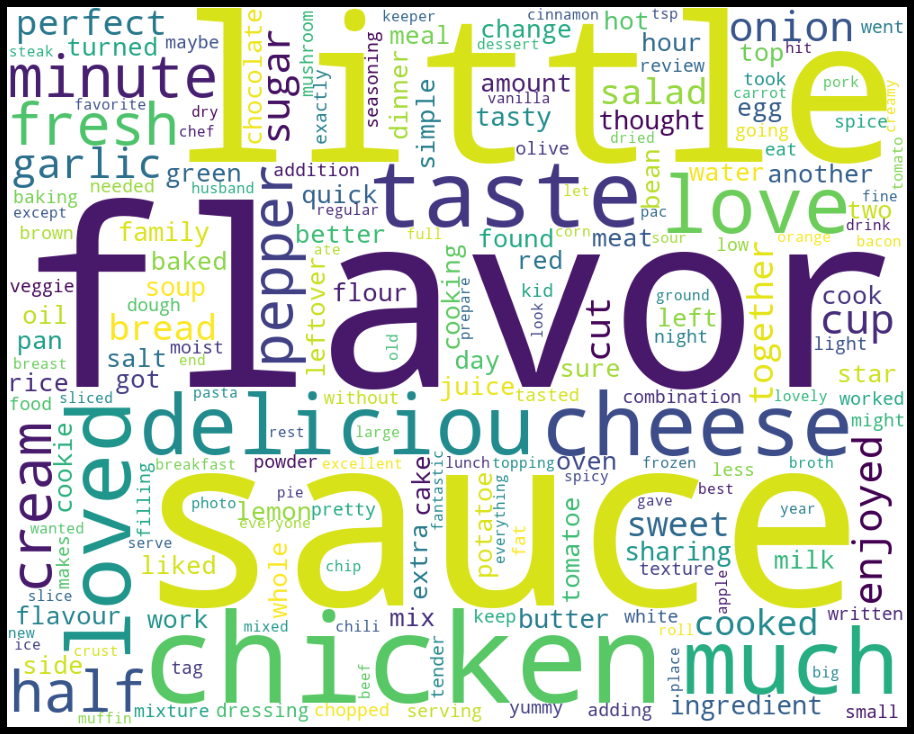

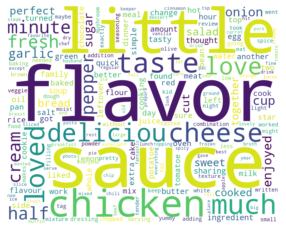

dict_keys(['flavor', 'sauce', 'little', 'chicken', 'taste', 'much', 'loved', 'cheese', 'deliciou', 'love', 'minute', 'fresh', 'cream', 'pepper', 'half', 'garlic', 'onion', 'cup', 'enjoyed', 'sugar', 'perfect', 'bread', 'salad', 'cut', 'together', 'sweet', 'cooked', 'ingredient', 'butter', 'soup', 'tasty', 'family', 'sharing', 'thought', 'change', 'cooking', 'top', 'amount', 'dinner', 'potatoe', 'liked', 'oil', 'pan', 'salt', 'quick', 'day', 'sure', 'rice', 'star', 'green', 'cake', 'whole', 'egg', 'red', 'hot', 'extra', 'oven', 'lemon', 'cookie', 'left', 'better', 'another', 'mix', 'chocolate', 'baked', 'side', 'flavour', 'milk', 'meal', 'found', 'hour', 'juice', 'cook', 'work', 'meat', 'two', 'flour', 'tomatoe', 'got', 'water', 'bean', 'turned', 'simple', 'leftover', 'dressing', 'spice', 'took', 'fat', 'worked', 'without', 'yummy', 'texture', 'white', 'serving', 'adding', 'brown', 'tasted', 'went', 'baking', 'food', 'going', 'light', 'eat', 'seasoning', 'dough', 'mushroom', 'moist', 's

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

word_cloud_text = ''
for index, rows in reviews.iterrows():
    word_cloud_text += rows['review_cleaned']
    
print(word_cloud_text)

wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=1000, height=800,collocations=False).generate(word_cloud_text)
plt.figure( figsize=(20,10) )

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


print(wordcloud.words_.keys())